# Regressão Linear Simples

**Perguna de Negócio:** 
O salário de acordo com os anos de educação superior? Se sim, é possível construir um modelo que estime o salário de acordo com esses anos? 

In [4]:
# Pacotes de manipulação de dados
import numpy as np
import pandas as pd

# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns 

# pacotes de Modelagem Estatística
import statsmodels.api as sm

# Importação da base de dados

In [39]:
df = pd.read_csv('base1.csv',
                 sep=';',
                 index_col='id')

In [40]:
df.shape

(46, 2)

In [44]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa
id,,,
1,5517.4,3,3
2,6399.9,4,6
3,6206.7,6,3
4,6060.6,4,5
5,6122.7,2,9


In [50]:
df = pd.read_csv('base2.csv',
           sep=';',
           index_col='id')

In [47]:
df.dtypes

Salario               float64
Anos_Educ_Superior      int64
Tempo_Empresa           int64
dtype: object

In [49]:
df.head()

,Salario,Anos_Educ_Superior,Tempo_Empresa
id,,,
1,5517.4,3,3
2,6399.9,4,6
3,6206.7,6,3
4,6060.6,4,5
5,6122.7,2,9


In [8]:
df.tail()

,Salario,Anos_Educ_Superior,Tempo_Empresa
id,,,
42,5499.4,5,7
43,8521.6,8,6
44,5170.9,1,5
45,6235.4,4,6
46,11460.2,12,27


In [9]:
df.dtypes

Salario               float64
Anos_Educ_Superior      int64
Tempo_Empresa           int64
dtype: object

# Análise Exploratória dos Dados

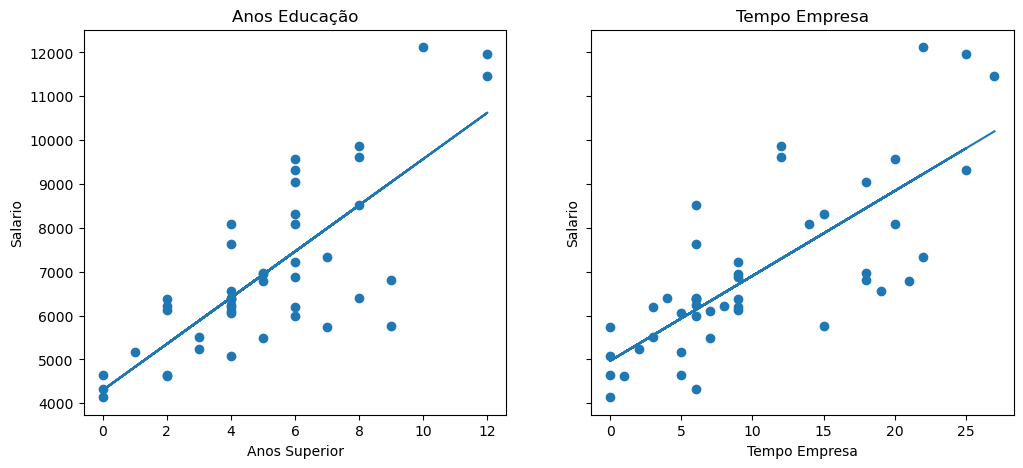

In [83]:
# Gráfico de Dispersão
fig,(ax1,ax2) = plt.subplots(1,2,sharey=True, figsize=(12,5)) # uma forma de usar os dois gráficos
ax1.set_title('Anos Educação')
ax2.set_title('Tempo Empresa')

ax1.set_xlabel('Anos Superior')
ax1.set_ylabel('Salario')

ax2.set_xlabel('Tempo Empresa')
ax2.set_ylabel('Salario')

ax1.scatter(df['Anos_Educ_Superior'], df['Salario'])
m, b = np.polyfit(df['Anos_Educ_Superior'], df['Salario'], 1)
ax1.plot(df['Anos_Educ_Superior'],m * df['Anos_Educ_Superior'] + b)

ax2.scatter(df['Tempo_Empresa'], df['Salario'])
m, b = np.polyfit(df['Tempo_Empresa'], df['Salario'], 1)
ax2.plot(df['Tempo_Empresa'],m * df['Tempo_Empresa'] + b)



## Ajuste do Modelo de Regressão Statsmodels

C:\Users\FIC\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

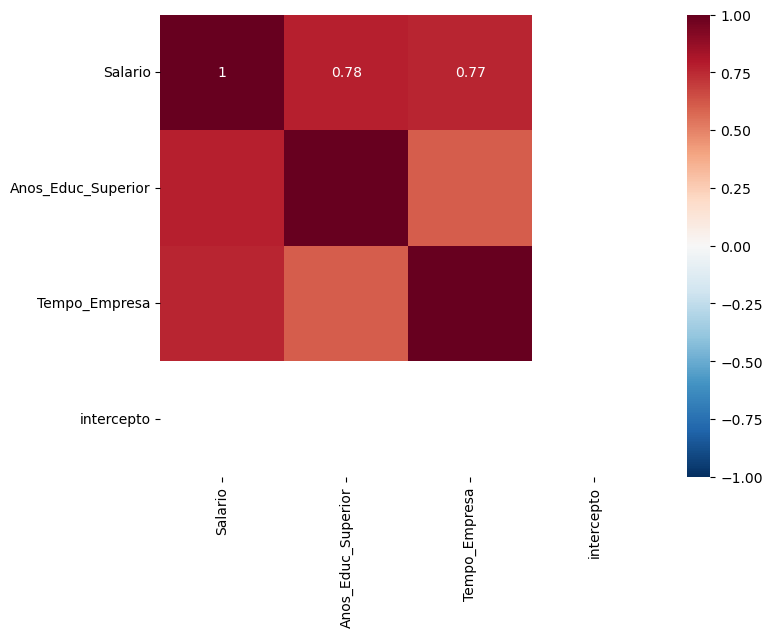

In [85]:
# Correlação Linear de Pearson
fig = plt.figure(figsize=(8,6))
sns.heatmap(
            df.corr(),
            cmap='RdBu_r',
            vmin=-1, vmax=1,
            annot=True
           )

In [72]:
# Variável Resposta
y = df['Salario']

# Variável Explicativa
df['intercepto'] = 1
x = df[['intercepto', 'Anos_Educ_Superior', 'Tempo_Empresa']]

In [73]:
# Ajuste do nosso modelo
modelo = sm.OLS(y,x)
resultado = modelo.fit()

In [74]:
# Resultado do ajuste
print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:                Salario   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     61.17
Date:                Sat, 29 Jun 2024   Prob (F-statistic):           2.66e-13
Time:                        15:01:49   Log-Likelihood:                -381.67
No. Observations:                  46   AIC:                             769.3
Df Residuals:                      43   BIC:                             774.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
intercepto          4056.0591    309